<a href="https://colab.research.google.com/github/Cgaz275/PTDL/blob/main/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pandas seaborn Bokeh matplotlib

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS
from bokeh.io import output_notebook

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# L√†m s·∫°ch d·ªØ li·ªáu
*  Ki·ªÉm tra c√°c gi√° tr·ªã null
*  Ki·ªÉm tra d·ªØ li·ªáu tr√πng l·∫Øp






In [23]:
#Ki·ªÉm tra t·ªïng c√°c gi√° tr·ªã null trong m·ªói thu·ªôc t√≠nh
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [24]:
#Lo·∫°i b·ªè d·ªØ li·ªáu c√≥ gi√° tr·ªã null
df.dropna(inplace=True)

In [25]:
#Ki·ªÉm tra tr√πng l·∫Øp
df.duplicated().sum()

np.int64(3008)

In [26]:
#Lo·∫°i b·ªè c√°c gi√° tr·ªã tr√πng
df.drop_duplicates(inplace=True)

# N·ªôi dung 1 - Ch√¢u Gia Anh


In [27]:
#Ki·ªÉm tra t·ªïng s·ªë c·ªôt v√† h√†ng c·ªßa d·ªØ li·ªáu : (h√†ng, c·ªôt)
df.shape

(11991, 10)

In [28]:
# C√°c th√¥ng tin v·ªÅ ki·ªÉu d·ªØ li·ªáu, t√™n tr∆∞·ªùng
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [29]:
# Mi√™u t·∫£ c√°c th√¥ng s·ªë c∆° b·∫£n c·ªßa d·ªØ li·ªáu
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11991.000000        11991.000000   11991.000000  11991.000000   
mean             200.473522            3.364857       0.154282      0.166041   
std               48.727813            1.330240       0.361234      0.372133   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

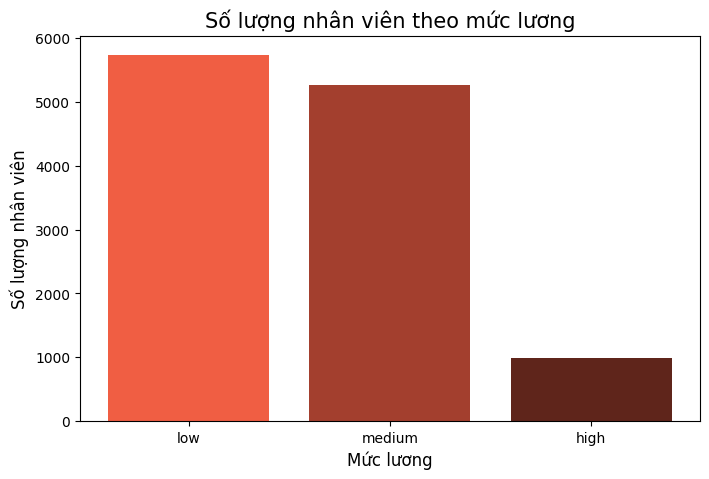

In [30]:
# ƒê·∫øm s·ªë l∆∞·ª£ng nh√¢n vi√™n theo t·ª´ng m·ª©c l∆∞∆°ng
salary_counts = df['salary'].value_counts()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8, 5))
plt.bar(salary_counts.index, salary_counts.values, color=['#F05E43', '#A33F2E', '#5F251B'])

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n
plt.xlabel("M·ª©c l∆∞∆°ng", size = 12)
plt.ylabel("S·ªë l∆∞·ª£ng nh√¢n vi√™n", size = 12)
plt.title("S·ªë l∆∞·ª£ng nh√¢n vi√™n theo m·ª©c l∆∞∆°ng", size = 15)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

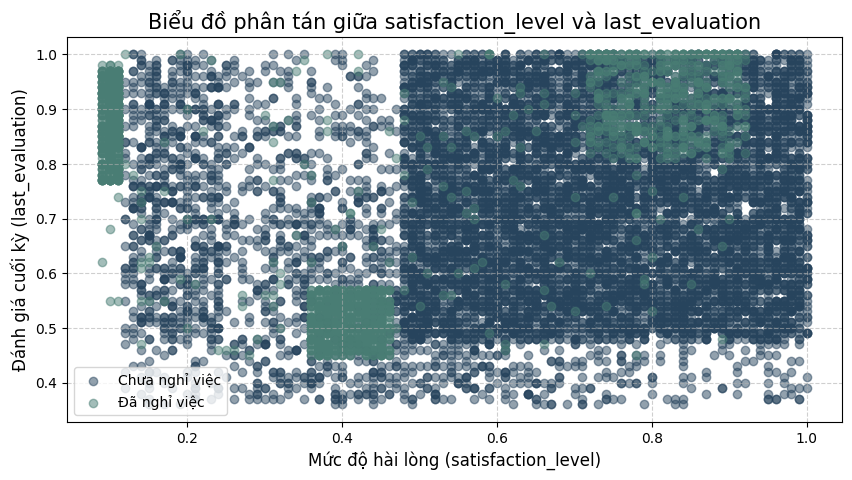

In [33]:
# T·∫°o hai nh√≥m: Nh√¢n vi√™n ƒë√£ ngh·ªâ v√† ch∆∞a ngh·ªâ
df_left = df[df['left'] == 1]  # Nh√¢n vi√™n ƒë√£ ngh·ªâ vi·ªác
df_stay = df[df['left'] == 0]  # Nh√¢n vi√™n v·∫´n l√†m vi·ªác

# V·∫Ω bi·ªÉu ƒë·ªì scatter
plt.figure(figsize=(10, 5))
plt.scatter(df_stay['satisfaction_level'], df_stay['last_evaluation'],
            color='#27445D', alpha=0.5, label="Ch∆∞a ngh·ªâ vi·ªác")
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'],
            color='#497D74', alpha=0.5, label="ƒê√£ ngh·ªâ vi·ªác")

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n
plt.xlabel("M·ª©c ƒë·ªô h√†i l√≤ng (satisfaction_level)", size = 12)
plt.ylabel("ƒê√°nh gi√° cu·ªëi k·ª≥ (last_evaluation)", size = 12)
plt.title("Bi·ªÉu ƒë·ªì ph√¢n t√°n gi·ªØa satisfaction_level v√† last_evaluation", size = 15)
plt.legend()  # Hi·ªÉn th·ªã ch√∫ th√≠ch
plt.grid(True, linestyle="--", alpha=0.6)  # Th√™m l∆∞·ªõi gi√∫p d·ªÖ nh√¨n

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

# N·ªôi dung 2 - ƒê√†o Th·ªã Thanh T√¢m

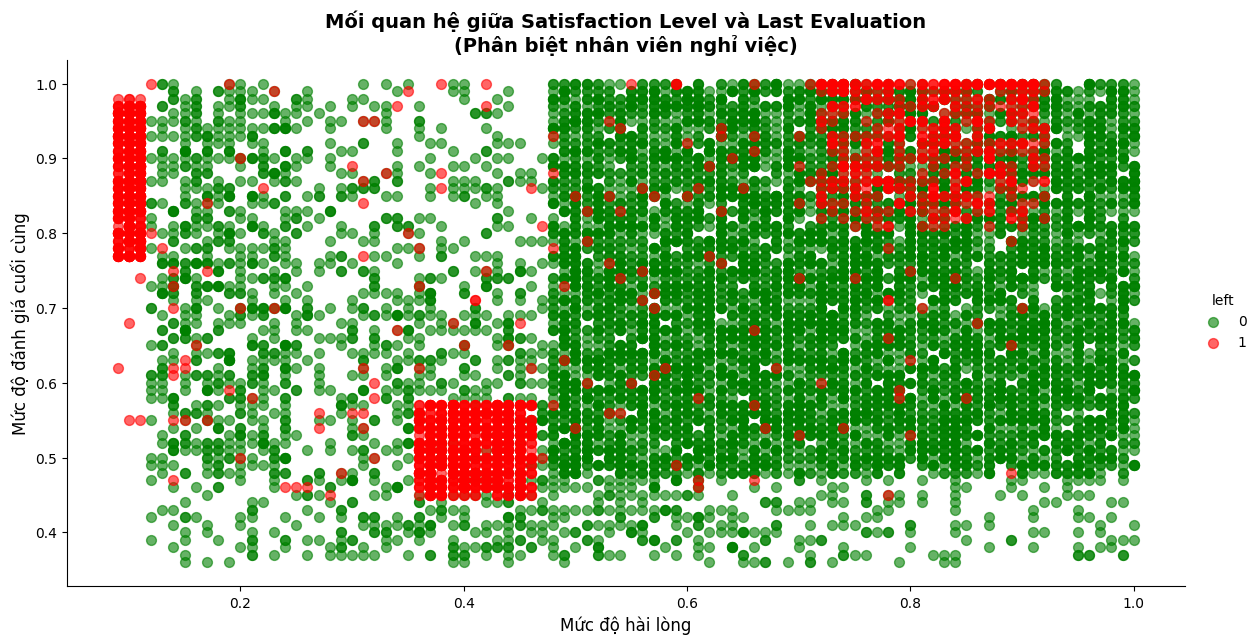

In [ ]:
plot = sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Kh√¥ng v·∫Ω ƒë∆∞·ªùng h·ªìi quy
    hue="left",  # Ph√¢n bi·ªát m√†u theo tr·∫°ng th√°i ngh·ªâ vi·ªác
    palette={0: "green", 1: "red"},  # M√†u s·∫Øc: Xanh cho nh√¢n vi√™n c√≤n l√†m, ƒê·ªè cho ngh·ªâ vi·ªác
    height=6,  # Chi·ªÅu cao bi·ªÉu ƒë·ªì
    aspect=2,  # T·ª∑ l·ªá khung h√¨nh (r·ªông h∆°n)
    scatter_kws={'s': 50, 'alpha': 0.6}  # K√≠ch th∆∞·ªõc ƒëi·ªÉm (s), ƒë·ªô trong su·ªët (alpha)
)

# T√πy ch·ªânh nh√£n v√† ti√™u ƒë·ªÅ
plt.xlabel("M·ª©c ƒë·ªô h√†i l√≤ng", fontsize=12)
plt.ylabel("M·ª©c ƒë·ªô ƒë√°nh gi√° cu·ªëi c√πng", fontsize=12)
plt.title("M·ªëi quan h·ªá gi·ªØa Satisfaction Level v√† Last Evaluation\n(Ph√¢n bi·ªát nh√¢n vi√™n ngh·ªâ vi·ªác)", fontsize=14, fontweight="bold")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

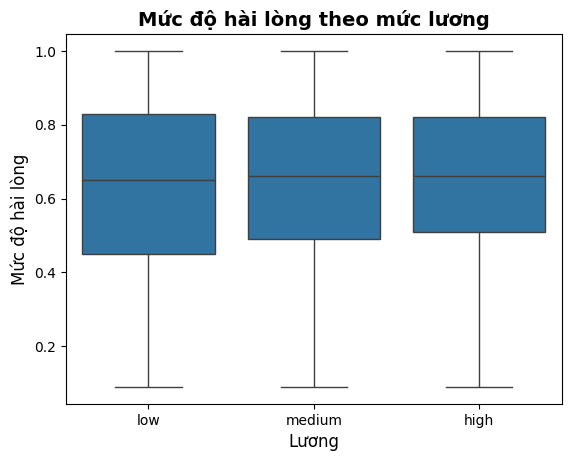

In [ ]:
# box plot
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.title("M·ª©c ƒë·ªô h√†i l√≤ng theo m·ª©c l∆∞∆°ng", fontsize=14, fontweight='bold')
plt.xlabel("L∆∞∆°ng", fontsize=12)
plt.ylabel("M·ª©c ƒë·ªô h√†i l√≤ng", fontsize=12)

plt.show()


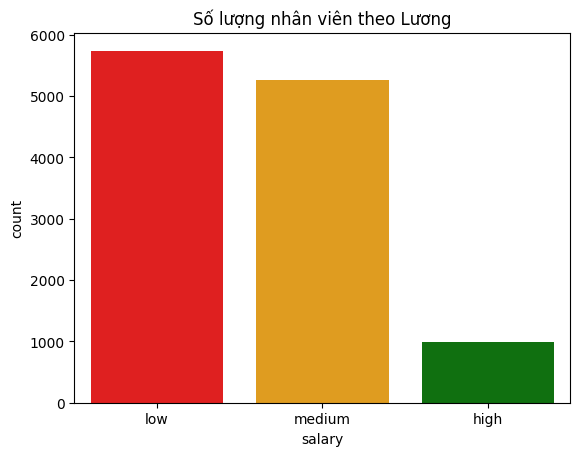

In [ ]:
# count plot
sns.countplot(x='salary', data=df, hue='salary',  palette={"low": "red", "medium": "orange", "high": "green"})
plt.title("S·ªë l∆∞·ª£ng nh√¢n vi√™n theo L∆∞∆°ng")
plt.show()

# N·ªôi dung 3 - D∆∞∆°ng L√™ Kh√°nh


In [ ]:
output_notebook()

### üìä 1. Bi·ªÉu ƒë·ªì c·ªôt: S·ªë l∆∞·ª£ng nh√¢n vi√™n theo Salary ###
salary_counts = df["salary"].value_counts()

bar_source = ColumnDataSource(data={
    'salary': salary_counts.index.tolist(),
    'count': salary_counts.values.tolist()
})

bar_chart = figure(x_range=salary_counts.index.tolist(),
                   title="S·ªë l∆∞·ª£ng nh√¢n vi√™n theo m·ª©c l∆∞∆°ng",
                   x_axis_label="M·ª©c l∆∞∆°ng",
                   y_axis_label="S·ªë l∆∞·ª£ng nh√¢n vi√™n",
                   width=800, height=400)

bar_chart.vbar(x='salary', top='count', width=0.6, source=bar_source, color="#FF9800")

### üéØ 2. Bi·ªÉu ƒë·ªì ph√¢n t√°n: Satisfaction Level vs Last Evaluation ###
color_map = {1: "#F50057", 0: "#00BFA5"}  # 0: T√≠m, 1: Xanh ng·ªçc
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'x': df['satisfaction_level'],
    'y': df['last_evaluation'],
    'salary': df['salary'],
    'left': df['left'].astype(str),
    'color': colors
})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('x', 'y', source=scatter_source, size=8, color='color', alpha=0.6)

hover = HoverTool()
hover.tooltips = [("Salary", "@salary"), ("Left", "@left")]
scatter_plot.add_tools(hover)

### üèóÔ∏è X·∫øp d·ªçc 2 bi·ªÉu ƒë·ªì ###
layout = column(bar_chart, scatter_plot)
show(layout)


In [ ]:


output_notebook()  # Hi·ªÉn th·ªã trong Jupyter Notebook

### üéØ Bi·ªÉu ƒë·ªì ph√¢n t√°n: Satisfaction Level vs Last Evaluation ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: T√≠m, 1: Xanh ng·ªçc

# D·ªØ li·ªáu chia theo nh√≥m
df_0 = df[df["left"] == 0]
df_1 = df[df["left"] == 1]

source_0 = ColumnDataSource(data={'x': df_0['satisfaction_level'], 'y': df_0['last_evaluation'], 'salary': df_0['salary']})
source_1 = ColumnDataSource(data={'x': df_1['satisfaction_level'], 'y': df_1['last_evaluation'], 'salary': df_1['salary']})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

# Th√™m 2 nh√≥m d·ªØ li·ªáu v·ªõi m√†u s·∫Øc kh√°c nhau
scatter_0 = scatter_plot.scatter('x', 'y', source=source_0, size=8, color=color_map[0], alpha=0.6, legend_label="Ch∆∞a ngh·ªâ vi·ªác")
scatter_1 = scatter_plot.scatter('x', 'y', source=source_1, size=8, color=color_map[1], alpha=0.6, legend_label="ƒê√£ ngh·ªâ vi·ªác")

hover = HoverTool()
hover.tooltips = [("Salary", "@salary")]
scatter_plot.add_tools(hover)

### üîò Th√™m Checkbox ƒë·ªÉ ·∫©n/hi·ªán nh√≥m ###
checkbox = CheckboxGroup(labels=["Ch∆∞a ngh·ªâ vi·ªác", "ƒê√£ ngh·ªâ vi·ªác"], active=[0, 1])  # M·∫∑c ƒë·ªãnh c·∫£ 2 ƒë·ªÅu hi·ªÉn th·ªã

# CustomJS ƒë·ªÉ ƒëi·ªÅu khi·ªÉn visibility
callback = CustomJS(args={'scatter_0': scatter_0, 'scatter_1': scatter_1, 'checkbox': checkbox}, code="""
    scatter_0.visible = checkbox.active.includes(0);
    scatter_1.visible = checkbox.active.includes(1);
""")
checkbox.js_on_change("active", callback)

### üèóÔ∏è X·∫øp d·ªçc Checkbox v√† Scatter Plot ###
layout = column(checkbox, scatter_plot)
show(layout)
